In [1]:
import pandas as pd
from matplotlib import pyplot as plt

from conf import DATASET

In [4]:
table = pd.ExcelFile(DATASET)

In [5]:
df_store = table.parse("store")
df_sales = table.parse("sales")

In [6]:
# Стандартизируем формат номера торговых точек
def format_tt(tt_number):
    if isinstance(tt_number, str):
        return int(tt_number.replace("N", ""))
    return tt_number

In [7]:
df_store["№ ТТ"] = df_store["№ ТТ"].apply(format_tt)

<Axes: xlabel='№ TT'>

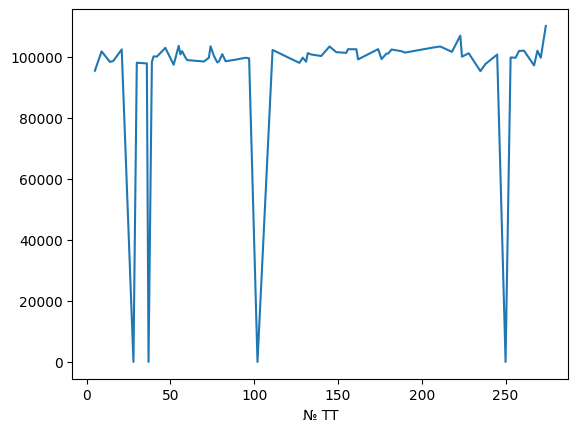

In [11]:
df_sales.groupby("№ TT")['КОЛ-ВО'].mean().plot() # Отсутствуют реальные данные о продажах на точках

<Axes: xlabel='№ TT'>

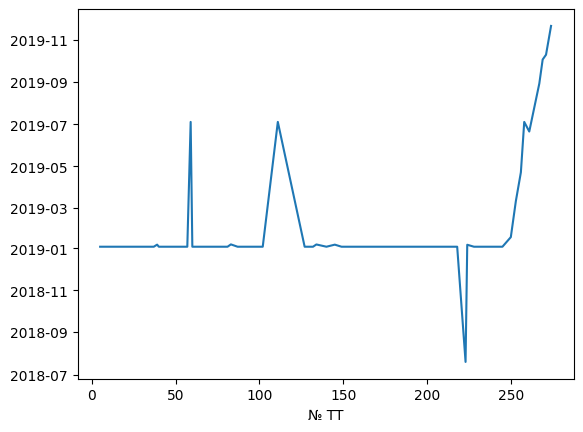

In [12]:
df_sales.groupby("№ TT")['НЕДЕЛЯ'].mean().plot() # Не хватает данных за какой-либо период времени

<Axes: >

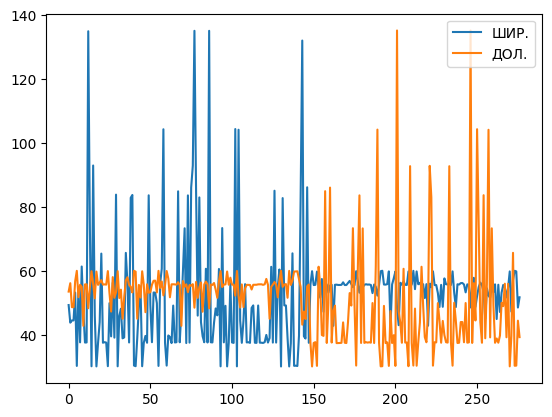

In [40]:
df_store[['ШИР.', 'ДОЛ.']].plot() # Координаты перепутаны местами (в центре видно как графики зеркально друг друга повторяют)

<Axes: >

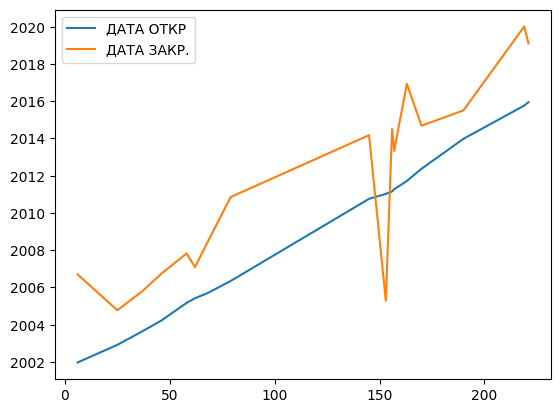

In [37]:
df_store[['ДАТА ОТКР', 'ДАТА ЗАКР.']].dropna().plot() # ТТ 155 закрылась раньше чем открылась

<Axes: >

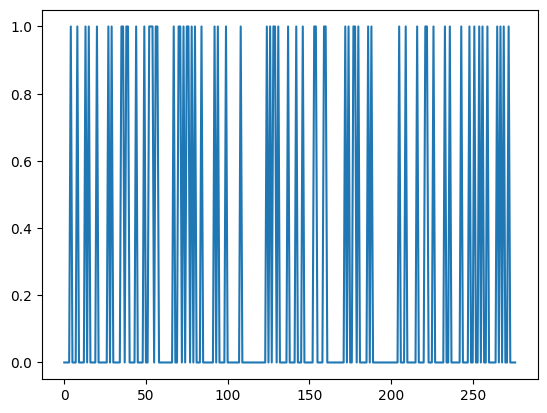

In [60]:
df_store.assign(tt_in_store=df_store["№ ТТ"].isin(df_sales["№ TT"]).astype(int))["tt_in_store"].plot() # Нет информации о многих точках в store которые присутствуют в sales